<a href="https://colab.research.google.com/github/vp19627/CE888/blob/master/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np


In [9]:

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)
len(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


14

In [28]:
# 1. Create an array of samples of shape (n_iterations, sample_size)
n_iterations = 1000
sample_size=len(data)
new_array = np.random.randint(len(data),size=(n_iterations,sample_size))
print(new_array)

# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
data_mean=np.mean(new_array)
print(data_mean)

# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it


list_of_means=[]
for item in new_array:
  list_of_means.append(np.mean(item))
print(list_of_means)
list_of_means_array=np.array(list_of_means)

#4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
ordered = sorted(list_of_means_array)
alpha=0.05
lower = np.percentile(ordered, (1-alpha)/2)
upper = np.percentile(ordered, alpha+((1-alpha)/2))
print(lower)
print(upper)



[[ 6 13  2 ... 10  7  7]
 [ 7  8  1 ... 13  7  0]
 [ 3  7 12 ... 13  1  2]
 ...
 [13  1  4 ...  2 12  1]
 [ 4  6  8 ...  3  7  0]
 [ 7  2  9 ...  6 13 10]]
6.542428571428571
[6.071428571428571, 5.428571428571429, 6.0, 6.285714285714286, 6.857142857142857, 5.142857142857143, 8.785714285714286, 4.142857142857143, 6.714285714285714, 5.857142857142857, 7.714285714285714, 4.928571428571429, 8.0, 7.214285714285714, 4.785714285714286, 7.571428571428571, 5.857142857142857, 7.714285714285714, 7.714285714285714, 8.071428571428571, 8.0, 6.857142857142857, 6.142857142857143, 7.857142857142857, 5.5, 6.571428571428571, 6.5, 7.071428571428571, 5.857142857142857, 7.428571428571429, 8.0, 7.785714285714286, 9.428571428571429, 7.0, 6.928571428571429, 6.357142857142857, 5.857142857142857, 7.642857142857143, 6.5, 5.571428571428571, 6.071428571428571, 5.428571428571429, 7.428571428571429, 7.142857142857143, 5.0, 6.714285714285714, 6.285714285714286, 6.785714285714286, 5.071428571428571, 4.428571428571429, 7

In [0]:

def boostrap_mean(data, sample_size, n_iterations):
  new_array = np.random.choice(sample_size,(n_iterations,sample_size),replace=True)
  data_mean=np.mean(new_array)
  list_of_means=[]
  for item in new_array:
    list_of_means.append(np.mean(item))
  list_of_means_array=np.array(list_of_means)
  ordered = sorted(list_of_means_array)
  alpha=0.95
  lower = np.percentile(ordered, ((1-alpha)/2)*100)
  upper = np.percentile(ordered, (alpha+((1-alpha)/2))*100)
  return data_mean, lower, upper

(0, 100000)

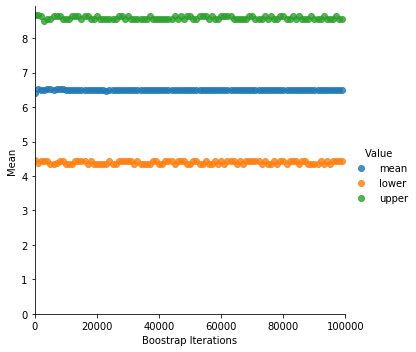

In [97]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [0]:
def boostrap_mean_ci(data, sample_size, n_iterations,ci):
  new_array = np.random.choice(sample_size,(n_iterations,sample_size),replace=True)
  data_mean=np.mean(new_array)
  list_of_means=[]
  for item in new_array:
    list_of_means.append(np.mean(item))
  list_of_means_array=np.array(list_of_means)
  ordered = sorted(list_of_means_array)
  alpha=ci/100
  lower = np.percentile(ordered, ((1-alpha)/2)*100)
  upper = np.percentile(ordered, (alpha+((1-alpha)/2))*100)
  return data_mean, lower, upper

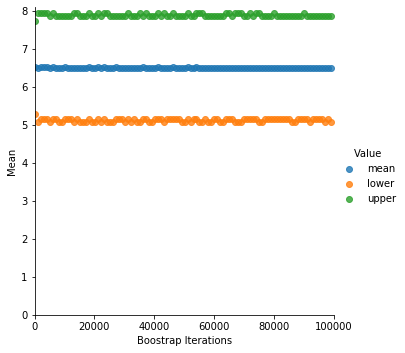

In [99]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')